# SONG POPULARITY PREDICTION & CONTENT BASED RECOMMENDER SYSTEM

In [603]:
import math
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix

In [604]:
import plotly.express as px

# 2. DATA COLLECTION

In [605]:
# Link for Dataset: https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset
df1 = pd.read_csv('music.csv')

# 3. DATA EXPLORATION, CLEANING & PREPROCESSING

In [606]:
count_na_percent =(df1.isna().sum()/len(df1))*100 #percentage of NAN in the dataset for each varible

In [607]:
df1 = df1.dropna() # drop NaN

In [608]:
# Dropping Unnamed column as it is duplicate of Index #
df2= df1.drop("Unnamed: 0",axis=1)
df2.explicit.replace({True: 1, False: 0}, inplace= True)

In [609]:
# Dropping Duplicate instances
df3 = df2.drop_duplicates(subset=['album_name']).reset_index(drop=True)

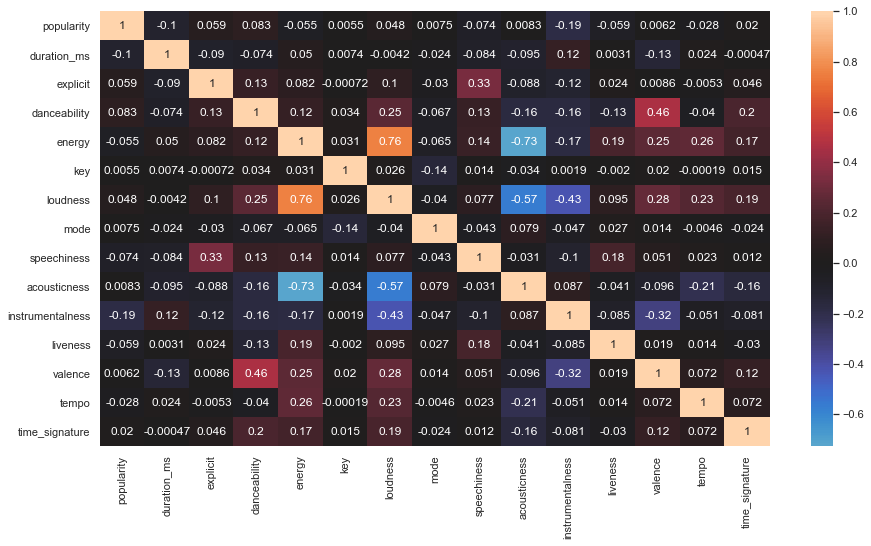

In [610]:
# Correlation/ Heatmap- Pearson's Coefficients
corr = df3.corr()
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.heatmap(corr, annot = True, center=0, ax = ax)

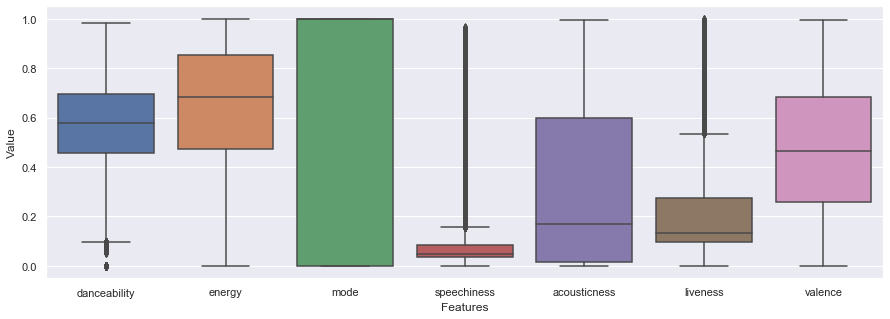

In [611]:
# Boxplots showing the Outliers
plt.figure(figsize=(15,5))
sns.boxplot(data=df2.drop(['track_id', 'artists', 'track_name','duration_ms','popularity','explicit', 'instrumentalness', 'tempo', 'time_signature', 'loudness','key'], axis=1))
plt.xlabel('Features')
plt.ylabel('Value')
plt.show()

In [612]:
# TOP 5 albums from each genre
df4=df3.groupby(['track_genre','popularity','album_name']).agg(pop=('popularity','sum')).reset_index()
df5=df4.sort_values(by=['track_genre','popularity'], ascending=True).groupby(['track_genre']).tail(5)

fig=px.treemap(df5, path=["track_genre", 'album_name'], values='pop', color='track_genre')
fig.update_layout(title_text='Top 5 albums from each genre', margin = dict(t=10, l=10, r=10, b=10))
fig.show()

In [613]:
# Top 5 tracks in terms of its popularity
df_top_tracks=df3.sort_values(by='popularity',ascending=False).head(10).reset_index(drop=True)
df_top_tracks.index=df_top_tracks.index + 1

In [614]:
df_top_tracks.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,0,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.2660,0.238,131.121,4,dance
2,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,0,0.621,0.782,2,-5.548,1,0.0440,0.01250,0.033000,0.2300,0.550,128.033,4,hip-hop
3,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,1,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.3710,0.304,128.040,4,dance
4,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,0,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.2180,0.850,124.980,4,latin
5,6Sq7ltF9Qa7SNFBsV5Cogx,Bad Bunny;Chencho Corleone,Un Verano Sin Ti,Me Porto Bonito,97,178567,1,0.911,0.712,1,-5.105,0,0.0817,0.09010,0.000027,0.0933,0.425,92.005,4,latin


In [615]:
# Artists with higher number of contents in the spotify dataset
df3['Count']=1
df_artist=df3.groupby('artists')['Count'].sum().reset_index().sort_values(by='Count',ascending=False)

In [616]:
df_artist

,artists,Count
23359,Vybz Kartel,73
20775,Sujatha,71
8244,George Jones,69
19394,Scooter,55
15914,Nogizaka46,49
...,...,...
9784,Inner City;ZebrA OctobrA,1
9783,"Inner City;Steve ""Silk"" Hurley",1
9781,Inner City;Serial Diva,1
9780,Inner City;Pique;Darksiight,1


# 4. DIMENSION REDUCTION

In [617]:
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

In [618]:
# Standardizing Data before implementing PCA
scaler = StandardScaler() 
df5=pd.DataFrame(scaler.fit_transform(df2.iloc[:, 4:18]))

In [619]:
# Finding Cumulative Proportion of Variance
pca = decomposition.PCA ()
pca.fit(df5)
df5_transformed=pca.transform(df5)
explained_variance = pca.explained_variance_
proportion_variance = pca.explained_variance_ratio_
cummulative_proportion_of_variance = pca.explained_variance_ratio_.cumsum()
x = []
x.append(proportion_variance)
#print("\n Explained variance : \n", explained_variance)
#print("\n Proportion_variance : \n", proportion_variance)
#print("\n cummulative proportion of variance : \n", cummulative_proportion_of_variance)

In [620]:
pca_df5_Standard=pd.DataFrame(data = df5_transformed)
a= pca_df5_Standard[pca_df5_Standard.columns[0:2]]

In [621]:
# Dropping loudness as its correlated highly with energy
df7= df3.drop(['loudness'], axis=1)

In [622]:
df7.head(20)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,Count
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,0,0.676,0.4610,1,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,1
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0,0.420,0.1660,1,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,1
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0,0.438,0.3590,0,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,1
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0,0.266,0.0596,0,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,1
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,0,0.618,0.4430,2,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,1
5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,0,0.688,0.4810,6,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic,1
6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,0,0.407,0.1470,2,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic,1
7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,0,0.703,0.4440,11,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic,1
8,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,0,0.442,0.6320,1,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic,1
9,4mzP5mHkRvGxdhdGdAH7EJ,Zack Tabudlo,Episode,Give Me Your Forever,74,244800,0,0.627,0.3630,8,1,0.0291,0.2790,0.000000,0.0928,0.3010,99.905,4,acoustic,1


LINEAR REGRESSION

In [628]:
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import linear_model, tree
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime
import random
import time
from statsmodels.stats.outliers_influence import variance_inflation_factor    
from joblib import Parallel, delayed
pd.set_option('display.max_columns', None)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [629]:
# Creating Dummies for categorical variables key and mode
cat_var= ['key', 'mode']
df8 = pd.get_dummies(df7, columns=cat_var)

In [630]:
df8.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,Count,key_0,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_0,mode_1
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,0,0.676,0.4610,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0,0.420,0.1660,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0,0.438,0.3590,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0,0.266,0.0596,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,0,0.618,0.4430,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [631]:
pd.options.display.max_columns = None

In [632]:
features = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "key_1", "key_2", "key_3", "key_4", "key_5", "key_6", "key_7", "key_8", "key_9", "key_10", "key_11", "liveness", 
            "mode_0","mode_1", "speechiness", "tempo", "valence"]

In [633]:
X = df8[features]
y = df8['popularity']

# Splitting Data to Train and Test Data.. 80% for Training and 20% for Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [634]:
X

,acousticness,danceability,duration_ms,energy,instrumentalness,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,liveness,mode_0,mode_1,speechiness,tempo,valence
0,0.0322,0.676,230666,0.4610,0.000001,1,0,0,0,0,0,0,0,0,0,0,0.3580,1,0,0.1430,87.917,0.7150
1,0.9240,0.420,149610,0.1660,0.000006,1,0,0,0,0,0,0,0,0,0,0,0.1010,0,1,0.0763,77.489,0.2670
2,0.2100,0.438,210826,0.3590,0.000000,0,0,0,0,0,0,0,0,0,0,0,0.1170,0,1,0.0557,76.332,0.1200
3,0.9050,0.266,201933,0.0596,0.000071,0,0,0,0,0,0,0,0,0,0,0,0.1320,0,1,0.0363,181.740,0.1430
4,0.4690,0.618,198853,0.4430,0.000000,0,1,0,0,0,0,0,0,0,0,0,0.0829,0,1,0.0526,119.949,0.1670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46584,0.0142,0.541,237280,0.5830,0.000000,0,1,0,0,0,0,0,0,0,0,0,0.1020,0,1,0.0285,96.008,0.2760
46585,0.0206,0.438,318874,0.5770,0.000013,0,0,0,0,1,0,0,0,0,0,0,0.2530,0,1,0.0357,139.983,0.1140
46586,0.9680,0.198,335999,0.2570,0.949000,0,0,0,0,0,0,0,1,0,0,0,0.1100,0,1,0.0415,89.494,0.0381
46587,0.9700,0.579,369049,0.2450,0.924000,0,0,0,1,0,0,0,0,0,0,0,0.1010,0,1,0.0384,112.011,0.3020


In [635]:
y

0        73
1        55
2        57
3        71
4        82
         ..
46584    44
46585    22
46586    21
46587    22
46588    38
Name: popularity, Length: 46589, dtype: int64

In [282]:
# Implementing regression models
XGBreg = XGBRegressor(scale_pos_weight=1,learning_rate=0.01, colsample_bytree = 0.3, subsample = 0.8, n_estimators=1000, 
                      reg_alpha = 0.3, max_depth=10, gamma=1)
ridge_model = linear_model.Ridge(alpha=.5)
lasso_model = linear_model.Lasso(alpha =.1)
tr = tree.DecisionTreeRegressor()
bayridge_model = linear_model.BayesianRidge()
lm = linear_model.LinearRegression()
poly_list = [PolynomialFeatures(degree=i, include_bias=False) for i in range(2,4)]
prm_list = [linear_model.LinearRegression() for i in range(2,4)]

In [283]:
# Performance Evaluation of Models
def model_metrics(model, X_test, y_test, decimals = 5, X_train = X_train, y_train = y_train):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = np.round(mean_squared_error(y_test, y_pred),decimals)
    rmse= np.round(np.sqrt(mse),decimals)
    r2 = np.round(r2_score(y_test, y_pred),decimals)
    return {'mean_squared_error': mse, 'R-Squared': r2}

In [284]:
# Performance Evaluation of Polynomial Models
def poly_model_metrics(models, poly_list, X_test, y_test, decimals = 5, X_train = X_train, y_train = y_train):
    metrics_list = []
    for i in range(len(models)):
        poly_features = poly_list[i].fit_transform(X_train)
        models[i].fit(poly_features, y_train)
        y_pred = models[i].predict(poly_list[i].fit_transform(X_test))
        mse = np.round(mean_squared_error(y_test, y_pred), decimals)
        rmse= np.round(np.sqrt(mse),decimals)
        r2 = np.round(r2_score(y_test, y_pred), decimals)
        metrics_list.append(
            {'mean_squared_error': mse, 'R-Squared': r2})
    return metrics_list

In [285]:
poly_models = poly_model_metrics(prm_list, poly_list, X_test, y_test)
poly_results = pd.DataFrame(
    [
        {'mean_squared_error': metrics['mean_squared_error'], 'R-Squared': metrics['R-Squared']} 
        for metrics in poly_models
    ],
    index = [f'PolynomiyalRegression_{i+2}_degrees' for i in range(len(poly_models))]) \
.reset_index() \
.rename(columns = {'index': 'model'})

In [286]:
# Performance Results for each regression models
results = pd.DataFrame(
    [
        model_metrics(XGBreg, X_test, y_test),
        model_metrics(ridge_model, X_test, y_test),
        model_metrics(lasso_model, X_test, y_test),
        model_metrics(tr, X_test, y_test),
        model_metrics(bayridge_model, X_test, y_test),
        model_metrics(lm, X_test, y_test)
    ], 
    index = ['XGBRegressor', 'Ridge', 'Lasso', 'DecisionTreeRegressor', 'BayesianRidge', 'LinearRegression']) \
.reset_index() \
.rename(columns={'index':'model'})

In [287]:
results = results.append(poly_results)

In [289]:
results.sort_values(['mean_squared_error', 'R-Squared'],
              ascending = [True, False])

,model,mean_squared_error,R-Squared
0,XGBRegressor,270.39122,0.17330
0,PolynomiyalRegression_2_degrees,289.60753,0.11455
5,LinearRegression,304.12692,0.07016
1,Ridge,304.12707,0.07016
4,BayesianRidge,304.13263,0.07014
2,Lasso,306.36421,0.06332
1,PolynomiyalRegression_3_degrees,320.30301,0.02070
3,DecisionTreeRegressor,532.18298,-0.62711


In [290]:
y_pred = XGBreg.predict(X_test)

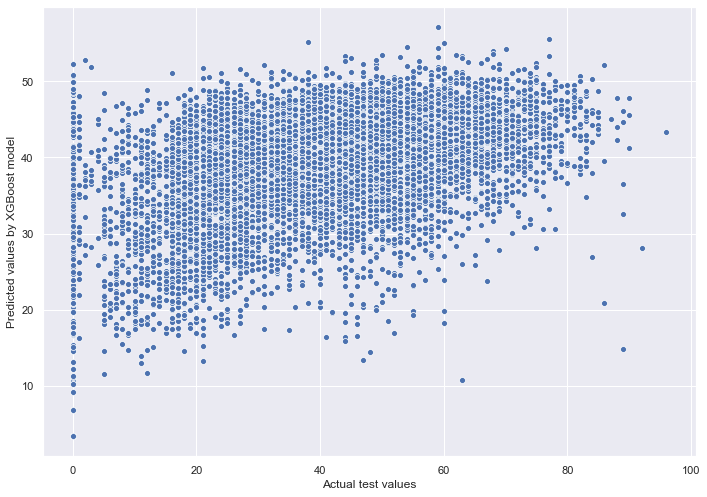

In [291]:
ax = sns.scatterplot(x=y_test, y=y_pred)
ax.set(xlabel='Actual test values', ylabel='Predicted values by XGBoost model')
plt.show()

In [292]:
xgb_model = XGBreg.fit(X_train, y_train)

In [293]:
xgb_ftr_imp = xgb_model.feature_importances_

In [294]:
# Computing feature importances.
pd.DataFrame({'feature':features, 'importance':xgb_ftr_imp}).sort_values(by='importance', ascending=False)

,feature,importance
4,instrumentalness,0.073256
2,duration_ms,0.064856
20,tempo,0.061831
0,acousticness,0.061830
3,energy,0.059677
21,valence,0.059189
19,speechiness,0.056802
16,liveness,0.051400
1,danceability,0.050983
18,mode_1,0.039172


**Regression Models didn't give good results. The best regression model (XGBooster) provided R^2 of 17% which is too low
As next step, we will bin popularity variable as Top, Average and Bottom and use classification algorithms for modelling. Our Plan is to use KNN and Decision Tree Classifier for modelling and try to predict "TOP" songs which will be among listoner's favorite**

In [580]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn import metrics

In [419]:
# Binning Popularity into 3 Bins- Bottom, Average, top
pd.cut(df8['popularity'], bins=3)

0         (66.667, 100.0]
1        (33.333, 66.667]
2        (33.333, 66.667]
3         (66.667, 100.0]
4         (66.667, 100.0]
               ...       
46584    (33.333, 66.667]
46585      (-0.1, 33.333]
46586      (-0.1, 33.333]
46587      (-0.1, 33.333]
46588    (33.333, 66.667]
Name: popularity, Length: 46589, dtype: category
Categories (3, interval[float64]): [(-0.1, 33.333] < (33.333, 66.667] < (66.667, 100.0]]

In [420]:
pd.cut(df8['popularity'], bins=3, labels = ["Bottom", "Average", "Top"]).value_counts()

Average    25240
Bottom     18223
Top         3126
Name: popularity, dtype: int64

In [421]:
df8['popularity'] = pd.cut(df8.popularity, bins=3, labels = ["Bottom", "Average", "Top"], right = True)

In [422]:
df8.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,Count,key_0,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_0,mode_1
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,Top,230666,0,0.676,0.4610,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,Average,149610,0,0.420,0.1660,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,Average,210826,0,0.438,0.3590,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,Top,201933,0,0.266,0.0596,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,Top,198853,0,0.618,0.4430,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [423]:
df8.loc[df8['popularity']== 'Top']

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,Count,key_0,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_0,mode_1
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,Top,230666,0,0.676,0.4610,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,Top,201933,0,0.266,0.0596,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,Top,198853,0,0.618,0.4430,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,Top,229400,0,0.407,0.1470,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,Top,242946,0,0.703,0.4440,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45749,6g6MHm9u0h2Em9Xuk89eqR,EDIS,Arıyorum,Arıyorum,Top,193805,0,0.442,0.7300,0.0755,0.0781,0.000005,0.1560,0.3810,97.062,4,turkish,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
45843,6wfb4nI2Vih263JqC8WSoW,Anıl Emre Daldal,M.,M.,Top,223750,0,0.575,0.3660,0.0281,0.5680,0.957000,0.1290,0.4440,100.004,4,turkish,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
45870,1xEpgyKx4ZHtefFAh0SmU5,EDIS,Martılar,Martılar,Top,157439,0,0.840,0.6110,0.0718,0.0615,0.000000,0.1310,0.8980,122.997,4,turkish,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
45995,10n66m41IGjA2ZulKPK7Ew,Madrigal,Seni Dert Etmeler,Seni Dert Etmeler,Top,188500,0,0.552,0.6080,0.0274,0.1480,0.000021,0.3320,0.8350,88.002,4,turkish,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [583]:
X = df8[features]
y = df8['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [584]:
scaler = StandardScaler()

# fit the StandardScaler on the training data
scaler.fit(X_train)

# transform the training and testing data using the fitted StandardScaler
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [586]:
model = GaussianNB()

# Model training
model.fit(X_train, y_train)

# Predict Output
predicted = model.predict([X_test[3]])

print("Actual Value:", y_test[3])
print("Predicted Value:", predicted[0])

Actual Value: Top
Predicted Value: Average


In [587]:
y_pred = model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.48132646490663233


In [588]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     Average       0.56      0.65      0.60      5040
      Bottom       0.52      0.27      0.36      3635
         Top       0.13      0.30      0.18       643

    accuracy                           0.48      9318
   macro avg       0.40      0.41      0.38      9318
weighted avg       0.51      0.48      0.48      9318



In [589]:
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

(9318, 3)

In [590]:
label_binarizer.transform(["Top"])

array([[0, 0, 1]])

In [591]:
class_of_interest = "Top"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

2

In [592]:
y_score = model.fit(X_train, y_train).predict_proba(X_test)

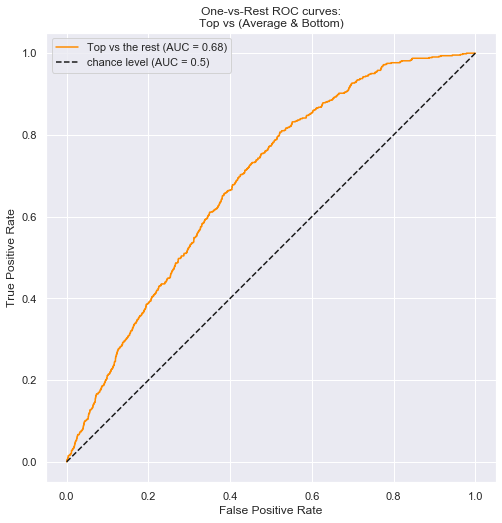

In [593]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nTop vs (Average & Bottom)")
plt.legend()
plt.show()

In [426]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [427]:
k_range = range(1, 21)
# list of scores from k_range
k_scores = []
# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain accuracy for KNeighborsClassifier with k neighbours
    knn.fit(X_train, y_train)
    y_pred_class = knn.predict(X_test)
    scores= metrics.accuracy_score(y_test, y_pred_class)
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

[0.5326250268297918, 0.5639622236531444, 0.5651427344923804, 0.5680403520068684, 0.5795235028976176, 0.5796308220648207, 0.5843528654217643, 0.5873578021034557, 0.590362738785147, 0.5898261429491307, 0.5924018029620091, 0.5895041854475209, 0.5951921013092938, 0.5912212921227731, 0.5946555054732775, 0.5913286112899764, 0.5961579738141232, 0.5936896329684481, 0.5952994204764971, 0.5936896329684481]


In [428]:
k_dict=dict(zip(k_range,k_scores))

Text(0, 0.5, 'Classification Accuracy')

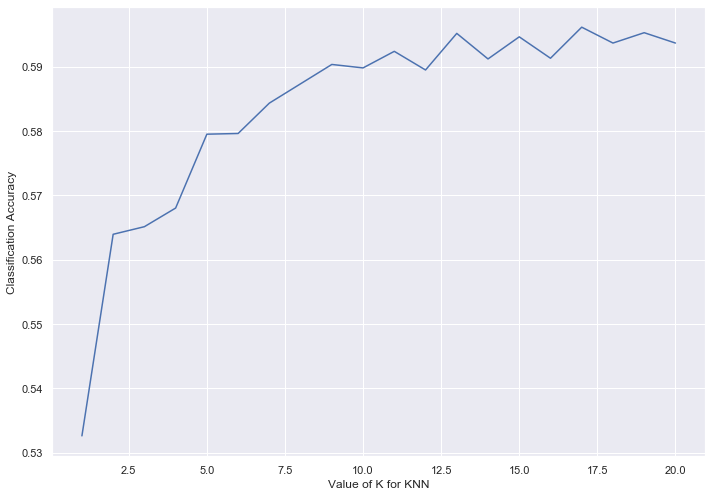

In [429]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Classification Accuracy')

In [430]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)

In [431]:
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

     Average       0.59      0.84      0.69      5040
      Bottom       0.60      0.36      0.45      3635
         Top       0.12      0.00      0.01       643

    accuracy                           0.60      9318
   macro avg       0.44      0.40      0.39      9318
weighted avg       0.56      0.60      0.55      9318



**For KNN too, the model performance evaluation seems POOR. This could be because of the fact that the dataset is highly imbalanced. There are only 3126 Top songs out of 46589 instances. Since the datset is imbalanced, we need to implement Oversampling technique.**

In [58]:
!pip install --upgrade imblearn

Requirement already up-to-date: imblearn in c:\users\aishw\anaconda3\lib\site-packages (0.0)


You should consider upgrading via the 'c:\users\aishw\anaconda3\python.exe -m pip install --upgrade pip' command.


In [486]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [487]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [522]:
# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [523]:
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_train, y_train)
print(X_ros.shape, y_ros.shape)

(60600, 22) (60600,)


In [524]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_ros, y_ros)

KNeighborsClassifier(n_neighbors=1)

In [525]:
y_pred_class = knn.predict(X_ros)
print(metrics.accuracy_score(y_ros, y_pred_class))

0.9954785478547855


In [526]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, random_state=99, test_size=0.5)

In [527]:
from sklearn.model_selection import RandomizedSearchCV
k_range2 = range(1, 22)
param_dist = dict(n_neighbors=k_range2)

In [528]:
rand = RandomizedSearchCV(knn, param_dist, cv=5, scoring='accuracy', n_iter=5, random_state=5)

In [529]:
rand.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=1),
                   n_iter=5, param_distributions={'n_neighbors': range(1, 22)},
                   random_state=5, scoring='accuracy')

In [530]:
rand.cv_results_

{'mean_fit_time': array([0.03102107, 0.01652713, 0.02196288, 0.01655197, 0.01898789]),
 'std_fit_time': array([0.01190581, 0.00180283, 0.00774001, 0.00166396, 0.00613728]),
 'mean_score_time': array([2.29347229, 2.87337394, 2.88901715, 2.91147628, 2.88284979]),
 'std_score_time': array([0.19076525, 0.01484583, 0.03812361, 0.08032282, 0.03157597]),
 'param_n_neighbors': masked_array(data=[3, 18, 20, 21, 19],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 3},
  {'n_neighbors': 18},
  {'n_neighbors': 20},
  {'n_neighbors': 21},
  {'n_neighbors': 19}],
 'split0_test_score': array([0.62062706, 0.50247525, 0.50132013, 0.50247525, 0.50379538]),
 'split1_test_score': array([0.63085809, 0.50891089, 0.49768977, 0.49587459, 0.5049505 ]),
 'split2_test_score': array([0.619967  , 0.49834983, 0.50082508, 0.49488449, 0.49867987]),
 'split3_test_score': array([0.6339934 , 0.51221122, 0.50346535, 0.50264026, 0.5094

In [531]:
# examining the best model
print(rand.best_score_) #single best score achieved across all params 
print(rand.best_params_) #Dictionary containing the parameters (k) used to generate that score
print(rand.best_estimator_) #estimator which gave the highest score 

0.625973597359736
{'n_neighbors': 3}
KNeighborsClassifier(n_neighbors=3)


In [532]:
# Fit KNN model on resampled data
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_ros, y_ros)

# Predict on test data
y_pred = knn.predict(X_test)

# Evaluate accuracy
print(metrics.accuracy_score(y_test, y_pred))

0.8562706270627063


In [533]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

     Average       0.84      0.75      0.79     10201
      Bottom       0.82      0.83      0.82      9986
         Top       0.91      1.00      0.95     10113

    accuracy                           0.86     30300
   macro avg       0.85      0.86      0.85     30300
weighted avg       0.85      0.86      0.85     30300



In [534]:
cmat = confusion_matrix(y_test, y_pred)

In [535]:
print('TP - True Negative {}'.format(cmat[0,0]))
print('FP - Flase Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Score: {}'.format(np.divide(np.sum([cmat[0,0], cmat[1,1], cmat[2,2]]), np.sum(cmat)))) 
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[1,0], cmat[0,1], cmat[0,2], cmat[2,0], cmat[1,2], cmat[2,1]]), np.sum(cmat))))

TP - True Negative 7619
FP - Flase Positive 1815
FN - False Negative 1461
TP - True Positive 8258
Accuracy Score: 0.8562706270627063
Misclassification Rate: 0.14372937293729374


In [536]:
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

(30300, 3)

In [537]:
label_binarizer.transform(["Top"])

array([[0, 0, 1]])

In [538]:
class_of_interest = "Top"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

2

In [539]:
y_score = knn.fit(X_train, y_train).predict_proba(X_test)

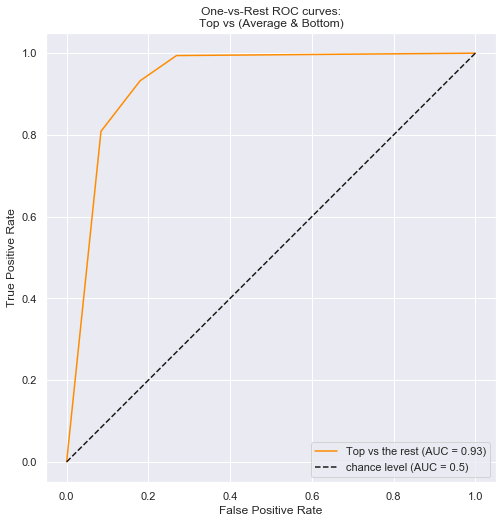

In [540]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nTop vs (Average & Bottom)")
plt.legend()
plt.show()

In [541]:
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint

In [559]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
classifier = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
classifier_cv = RandomizedSearchCV(classifier, param_dist, cv=5)

# Fit it to the data
classifier_cv.fit(X_ros, y_ros)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(classifier_cv.best_params_))
print("Best score is {}".format(classifier_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 2}
Best score is 0.718003300330033


In [560]:
classifier = DecisionTreeClassifier(criterion= 'entropy', max_depth=None, max_features=1, min_samples_leaf= 2)
classifier.fit(X_ros, y_ros)
y_pred_class = classifier.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))

0.9152475247524753


In [561]:
y_pred_class = classifier.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))

0.9152475247524753


In [562]:
cmat = confusion_matrix(y_test, y_pred_class)

In [563]:
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

     Average       0.86      0.91      0.89     10201
      Bottom       0.93      0.84      0.88      9986
         Top       0.96      1.00      0.98     10113

    accuracy                           0.92     30300
   macro avg       0.92      0.91      0.91     30300
weighted avg       0.92      0.92      0.91     30300



In [564]:
print('TP - True Negative {}'.format(cmat[0,0]))
print('FP - Flase Positive {}'.format(cmat[0,2]))
print('FN - False Negative {}'.format(cmat[2,0]))
print('TP - True Positive {}'.format(cmat[2,2]))
print('Accuracy Score: {}'.format(np.divide(np.sum([cmat[0,0], cmat[1,1], cmat[2,2]]), np.sum(cmat)))) 
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[1,0], cmat[0,1], cmat[0,2], cmat[2,0], cmat[1,2], cmat[2,1]]), np.sum(cmat))))

TP - True Negative 9294
FP - Flase Positive 312
FN - False Negative 8
TP - True Positive 10092
Accuracy Score: 0.9152475247524753
Misclassification Rate: 0.08475247524752476


In [565]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

(30300, 3)

In [566]:
label_binarizer.transform(["Top"])

array([[0, 0, 1]])

In [567]:
class_of_interest = "Top"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

2

In [568]:
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

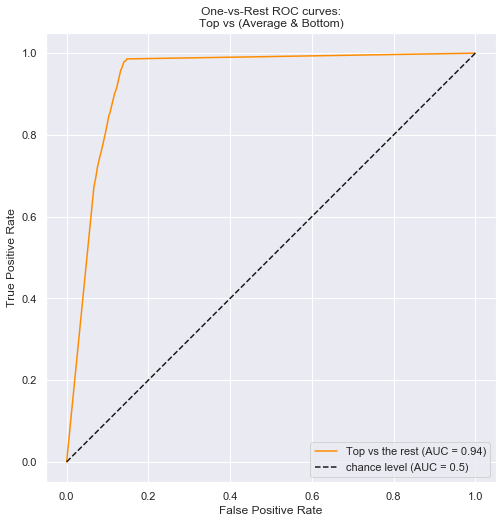

In [569]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nTop vs (Average & Bottom)")
plt.legend()
plt.show()

# MUSIC RECOMMENDATION SYSTEM

In [636]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

In [637]:
df8['feature_extract'] = df8['acousticness'].astype(str) + ' ' + df8['danceability'].astype(str) + ' ' + df8['duration_ms'].astype(str) + ' ' + df8['instrumentalness'].astype(str) + ' ' + df8['liveness'].astype(str) + ' ' +  df8['speechiness'].astype(str) + ' ' +  df8['tempo'].astype(str) + ' ' +  df8['valence'].astype(str)+ ' ' +  df8['track_genre']+ ' '+ df8['popularity'].astype(str)
df8['feature_extract'] = df8['feature_extract'].fillna('')

In [638]:
# Create bag of words
vectorizer = CountVectorizer()
bow = vectorizer.fit_transform(df8['feature_extract'])

In [639]:
# Convert bag of words to TF-IDF
tfidf_transformer = TfidfTransformer()
tfidf = tfidf_transformer.fit_transform(bow)

In [640]:
# Apply latent semantic analysis
lsa = TruncatedSVD(n_components=100, algorithm='arpack')
lsa.fit(tfidf)

TruncatedSVD(algorithm='arpack', n_components=100)

In [183]:
pip install memory_profiler

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\aishw\anaconda3\python.exe -m pip install --upgrade pip' command.


In [643]:
import time
from memory_profiler import memory_usage

# Remove unnecessary columns from df8
df8 = df8[['track_name', 'feature_extract']]

# Prompt the user to input a song name and handle errors
while True:
    song_input = input("Enter a song name: ")
    if song_input in df8['track_name'].values:
        break
    else:
        print("Invalid song name. Please try again.")

# Find the index of the input song
song_index = df8[df8['track_name'] == song_input].index[0]

# Compute the cosine similarities between the input song and others
start_time = time.time()
similarity_scores = cosine_similarity(tfidf[song_index], tfidf)
end_time = time.time()

# Get the top 10 most similar songs
similar_songs = list(enumerate(similarity_scores[0]))
sorted_similar_songs = sorted(similar_songs, key=lambda x: x[1], reverse=True)[1:11]

# Print the top 10 similar songs
for i, score in sorted_similar_songs:
    print("{}: {}".format(i, df8.loc[i, 'track_name']))

# Measure the execution time and memory usage
execution_time = end_time - start_time
memory_usage = max(memory_usage())
print("Execution time: {:.2f} seconds".format(execution_time))
print("Memory usage: {:.2f} MiB".format(memory_usage))

Enter a song name: Hold On
1348: Can't Stop
38178: My Boy
21735: Solus
208: Almost Lover
17457: Sonhar / Me Usa / Que Saudade - Ao Vivo
681: Wind in Your Sails
45751: Seyre Dursun Aşk - Akustik
5185: Todas as Janelas
36523: Colores
531: So Are We
Execution time: 0.03 seconds
Memory usage: 147.90 MiB
